## 1. Importing libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [10]:
#Checking for matplotlib version
matplotlib.__version__

'3.5.1'

In [11]:
# Ensure the charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [12]:
# Defining path
path = '/Users/mdiaz/Desktop/NWWS data/Data'

In [13]:
# Import data
df = pd.read_csv(os.path.join(path, 'Prepared', 'Clean NWWS.csv'))

In [14]:
# Data check 
df.head()

,Unnamed: 0,state,id,county names,population_served,collection date,15dy percent change,percentile,current percentile levels,_merge
0,0,Hawaii,710,Kauai,10000,2022-12-27,5649.0,27.500,2,both
1,1,Maryland,547,Howard,270000,2022-12-27,-48.0,52.800,58,both
2,2,New York,426,Orange,6729,2022-12-27,-99.0,53.250,64,both
3,3,Oregon,932,Deschutes,92850,2022-12-27,-100.0,15.333,0,both
4,4,Oregon,956,Jackson,133708,2022-12-27,-70.0,20.333,0,both


## 2. Data Check

In [15]:
# Dropping merged columm
df.drop(columns = ['_merge'])

,Unnamed: 0,state,id,county names,population_served,collection date,15dy percent change,percentile,current percentile levels
0,0,Hawaii,710,Kauai,10000,2022-12-27,5649.0,27.500,2
1,1,Maryland,547,Howard,270000,2022-12-27,-48.0,52.800,58
2,2,New York,426,Orange,6729,2022-12-27,-99.0,53.250,64
3,3,Oregon,932,Deschutes,92850,2022-12-27,-100.0,15.333,0
4,4,Oregon,956,Jackson,133708,2022-12-27,-70.0,20.333,0
...,...,...,...,...,...,...,...,...,...
841,841,Montana,977,Lewis And Clark,37125,2022-12-27,192.0,59.333,60
842,842,Oregon,950,Josephine,37725,2022-12-27,-100.0,11.000,0
843,843,West Virginia,735,Taylor,6071,2022-12-27,-95.0,83.818,84
844,844,California,1709,San Bernardino,890000,2022-12-27,-23.0,78.000,78


In [16]:
# Types
df.dtypes

Unnamed: 0                      int64
state                          object
id                              int64
county names                   object
population_served               int64
collection date                object
15dy percent change           float64
percentile                    float64
current percentile levels       int64
_merge                         object
dtype: object

In [17]:
# Check for missing values
df.isnull().sum() # No missing values!

Unnamed: 0                    0
state                         0
id                            0
county names                  0
population_served             0
collection date               0
15dy percent change           0
percentile                    0
current percentile levels     0
_merge                        0
dtype: int64

In [18]:
# Locate duplicates
df_dups = df[df.duplicated()]

In [19]:
df_dups.shape # No duplicates 

(0, 10)

In [20]:
#Mixed data types
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

During the cleaning process in the 1st data script, there were mixed data types for '15dy percentile change and 'percentile' columns with Nan or New Site, which were placeholders for sites that did not submit the test results. 

## 3. Exploring relationships

### Correlations

In [21]:
# Create a correlation matrix using pandas
df.corr()

,Unnamed: 0,id,population_served,15dy percent change,percentile,current percentile levels
Unnamed: 0,1.000000,0.001289,0.007864,-0.044266,-0.046608,0.087838
id,0.001289,1.000000,0.002069,0.001397,0.216946,-0.184091
population_served,0.007864,0.002069,1.000000,-0.018965,0.007304,0.097371
15dy percent change,-0.044266,0.001397,-0.018965,1.000000,-0.021241,-0.068637
percentile,-0.046608,0.216946,0.007304,-0.021241,1.000000,-0.277836
current percentile levels,0.087838,-0.184091,0.097371,-0.068637,-0.277836,1.000000


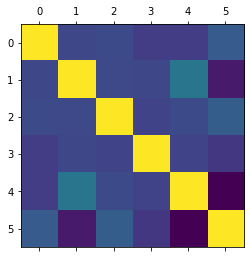

In [22]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

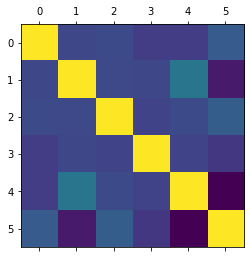

In [23]:
# Save visual to working directory
plt.matshow(df.corr())
plt.savefig("out.png")

In [24]:
#check current directory
cwd = os.getcwd()
cwd

'/Users/mdiaz/Desktop/NWWS data/Data/Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

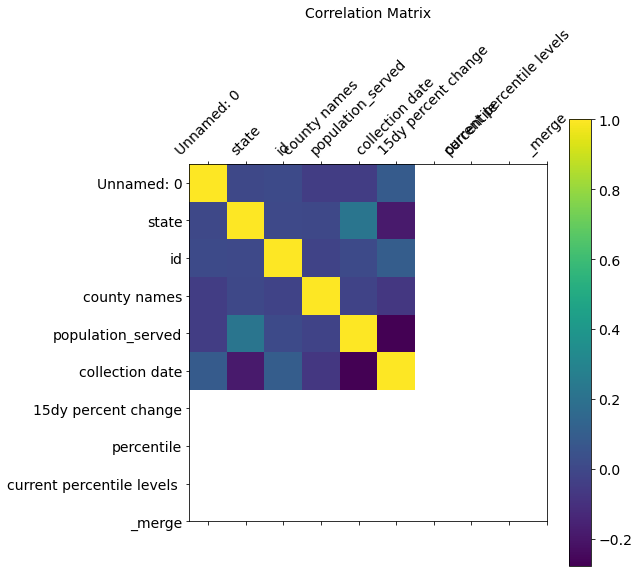

In [25]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

The coefficients in the plot mean that there are some strong relationships between some variables. 

### Creating Correlation heatmap with seaborn

In [26]:
df.columns

Index(['Unnamed: 0', 'state', 'id', 'county names', 'population_served',
       'collection date', '15dy percent change', 'percentile',
       'current percentile levels ', '_merge'],
      dtype='object')

In [27]:
# Create a subset excluding the _merge columns 
sub = df[['state', 'county names', 'population_served', '15dy percent change','percentile', 'current percentile levels ']]

In [28]:
sub

,state,county names,population_served,15dy percent change,percentile,current percentile levels
0,Hawaii,Kauai,10000,5649.0,27.500,2
1,Maryland,Howard,270000,-48.0,52.800,58
2,New York,Orange,6729,-99.0,53.250,64
3,Oregon,Deschutes,92850,-100.0,15.333,0
4,Oregon,Jackson,133708,-70.0,20.333,0
...,...,...,...,...,...,...
841,Montana,Lewis And Clark,37125,192.0,59.333,60
842,Oregon,Josephine,37725,-100.0,11.000,0
843,West Virginia,Taylor,6071,-95.0,83.818,84
844,California,San Bernardino,890000,-23.0,78.000,78


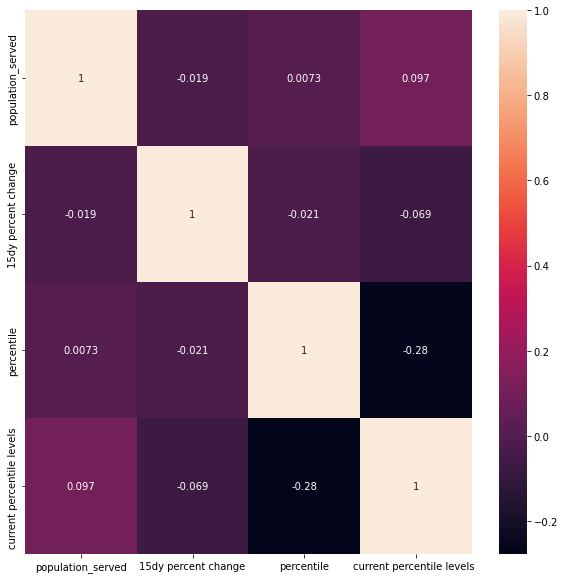

In [29]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplots

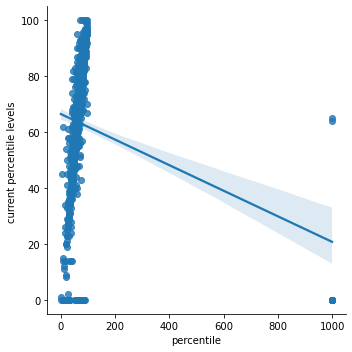

In [30]:
# Create a scatterplot for the "percentile" and "Current virus levels in wastewater by site (in %)" columns in seaborn

sns.lmplot(x = 'percentile', y = 'current percentile levels ', data = df)

### Pair plots

In [31]:
# Keep only the variables you want to use in the pair plot
sub_2 = sub[['percentile', '15dy percent change', 'current percentile levels ']]

In [ ]:
# Create a pair plot 
g = sns.pairplot(sub_2)

### Categorical Plots 

Creating a categorical variable that splits the "15dy percent change" column into categories

In [ ]:
sns.histplot(df['15dy percent change'], bins = 20, kde = True)

In [ ]:
df.loc[df['15dy percent change'] < -100, 'Percent change category'] = 'Large decrease'

In [ ]:
df.loc[(df['15dy percent change'] >= -99) & (df['15dy percent change'] < -10), 'Percent change category'] = 'Decrease'


In [ ]:
df.loc[(df['15dy percent change'] >= -9) & (df['15dy percent change'] < 9), 'Percent change category'] = 'Stable'


In [ ]:
df.loc[(df['15dy percent change'] >= 10) & (df['15dy percent change'] < 99), 'Percent change category'] = 'Increase'

In [ ]:
df.loc[df['15dy percent change'] < 100, 'Percent change category'] = 'Large increase'

In [ ]:
df['Percent change category'].value_counts(dropna = False)

In [ ]:
df.columns

In [ ]:
#Create a categorical plot in seaborn using the percent change categories created above
sns.set(style="ticks")
g = sns.catplot(x="percentile", y="15dy percent change", hue="Percent change category", data=df)

In [ ]:
#fig = g.get_figure()
g.savefig("out.png")